# **Kết Nối Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Import Thư Viện và Load Data**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [ ]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/Project/đồ án ML/bank-additional-full.csv', sep = ';')
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **Tiền Xử Lý Dữ Liệu**

## *- Kiểm Tra missing values*

In [ ]:
# Kiểm tra thông tin dữ liệu
data.info()
# các columns đều đúng kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Kiểm tra các cột chứa dữ liệu thiếu
data.isna().sum()
# không có missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
cate_col = [i for i in data.columns ]
for i in cate_col:
  unique = data[i].unique().tolist()
  print(i ,"  ", unique)

age    [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]
job    ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
marital    ['married', 'single', 'divorced', 'unknown']
education    ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
default    ['no', 'unknown', 'yes']
housing    ['no', 'yes', 'unknown']
loan    ['no', 'yes', 'unknown']
contact    ['telephone', 'cellular']
month    ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
day_of_week    ['mon', 'tue', 'wed', 'thu', 'fri']
duration    [261, 149, 226, 151, 307, 198, 139, 217

In [ ]:
data = data.drop(["month","day_of_week","contact"],axis=1)

## *- Xử Lý các cột chứa giá trị 'unknown' và encode*



In [ ]:
# Các cột chứa giá trị 'unknown'
categoricals = []
for i in data.columns:
  if data[data[i]=='unknown'].shape[0] > 0:
    categoricals.append(i)
categoricals

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [ ]:
# Các cột chứa giá trị numerical
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Encoder các cột categorical
d = data.copy()
le = LabelEncoder()
for col in categoricals:
    le.fit(d[col])
    d[col+'_encoded'] = le.transform(d[col])
    d.loc[d[col]=='unknown', col+'_encoded'] = np.nan

d = d.drop(columns = categoricals, axis=1)
d

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded
0,56,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.0,1.0,0.0,0.0,0.0,0.0
1,57,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7.0,1.0,3.0,NaN,0.0,0.0
2,37,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7.0,1.0,3.0,0.0,2.0,0.0
3,40,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,1.0,1.0,0.0,0.0,0.0
4,56,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7.0,1.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,5.0,1.0,5.0,0.0,2.0,0.0
41184,46,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.0,1.0,5.0,0.0,0.0,0.0
41185,56,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,5.0,1.0,6.0,0.0,2.0,0.0
41186,44,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,9.0,1.0,5.0,0.0,0.0,0.0


In [ ]:
# Kiểm tra một lần nữa các cột chứa dữ liệu bị thiếu
d.isna().sum().sort_values(ascending = False)

default_encoded      8597
education_encoded    1731
loan_encoded          990
housing_encoded       990
job_encoded           330
marital_encoded        80
duration                0
y                       0
nr.employed             0
age                     0
cons.conf.idx           0
cons.price.idx          0
emp.var.rate            0
poutcome                0
previous                0
pdays                   0
campaign                0
euribor3m               0
dtype: int64

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   duration           41188 non-null  int64  
 2   campaign           41188 non-null  int64  
 3   pdays              41188 non-null  int64  
 4   previous           41188 non-null  int64  
 5   poutcome           41188 non-null  object 
 6   emp.var.rate       41188 non-null  float64
 7   cons.price.idx     41188 non-null  float64
 8   cons.conf.idx      41188 non-null  float64
 9   euribor3m          41188 non-null  float64
 10  nr.employed        41188 non-null  float64
 11  y                  41188 non-null  object 
 12  job_encoded        40858 non-null  float64
 13  marital_encoded    41108 non-null  float64
 14  education_encoded  39457 non-null  float64
 15  default_encoded    32591 non-null  float64
 16  housing_encoded    401

In [ ]:
# Mã hóa dữ liệu của các biến phân loại
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
for i in d.columns:
  if d[i].dtypes == 'object':
    d[i] = ord_enc.fit_transform(d[[i]]).astype('int')

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   duration           41188 non-null  int64  
 2   campaign           41188 non-null  int64  
 3   pdays              41188 non-null  int64  
 4   previous           41188 non-null  int64  
 5   poutcome           41188 non-null  int64  
 6   emp.var.rate       41188 non-null  float64
 7   cons.price.idx     41188 non-null  float64
 8   cons.conf.idx      41188 non-null  float64
 9   euribor3m          41188 non-null  float64
 10  nr.employed        41188 non-null  float64
 11  y                  41188 non-null  int64  
 12  job_encoded        40858 non-null  float64
 13  marital_encoded    41108 non-null  float64
 14  education_encoded  39457 non-null  float64
 15  default_encoded    32591 non-null  float64
 16  housing_encoded    401

In [ ]:
d

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded
0,56,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0,0.0,0.0,0.0,0.0
1,57,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0,3.0,NaN,0.0,0.0
2,37,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0,3.0,0.0,2.0,0.0
3,40,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0,1.0,0.0,0.0,0.0
4,56,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,5.0,1.0,5.0,0.0,2.0,0.0
41184,46,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,1.0,1.0,5.0,0.0,0.0,0.0
41185,56,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,5.0,1.0,6.0,0.0,2.0,0.0
41186,44,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,9.0,1.0,5.0,0.0,0.0,0.0


## *Xử Lý Outliers*

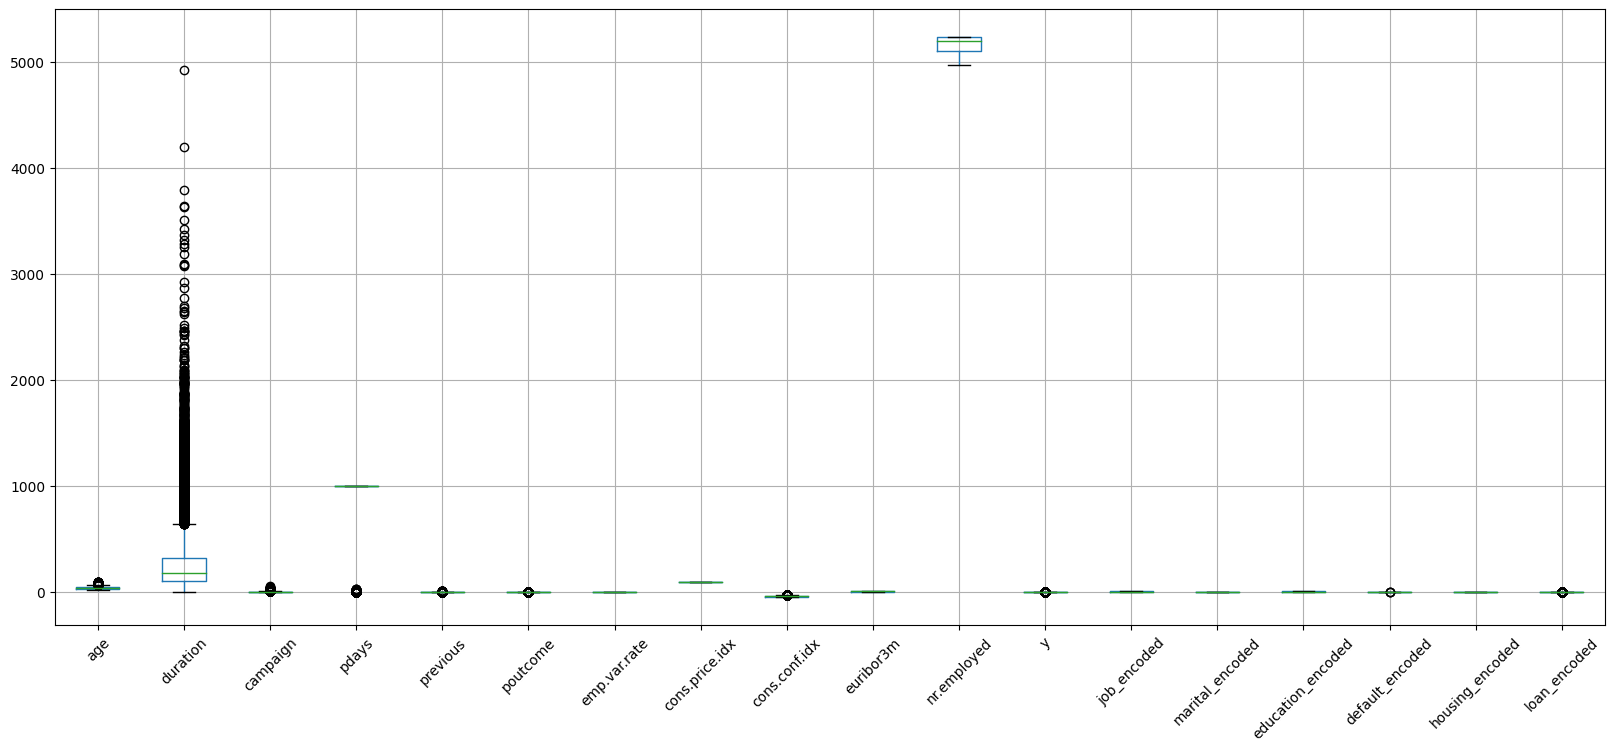

In [ ]:
# Vẽ biểu đồ boxplot thể hiện các cột chứa các outliers
plt.figure(figsize=(20,8))
d.boxplot()
plt.xticks(rotation=45)
print()

Từ biểu đồ trên, ta thấy cột như: duration là chứa nhiều giá trị outliers nhất và các cột age, campaign, pdays, previous, cons.conf.idx, default_encoded, loan_encoded có chứa dữ liệu khuyết thiếu nhưng không đáng kể.
Mình sẽ tiến hành kiểm tra từng biến để xem sẽ xử lý cột nào.

<Axes: ylabel='loan_encoded'>

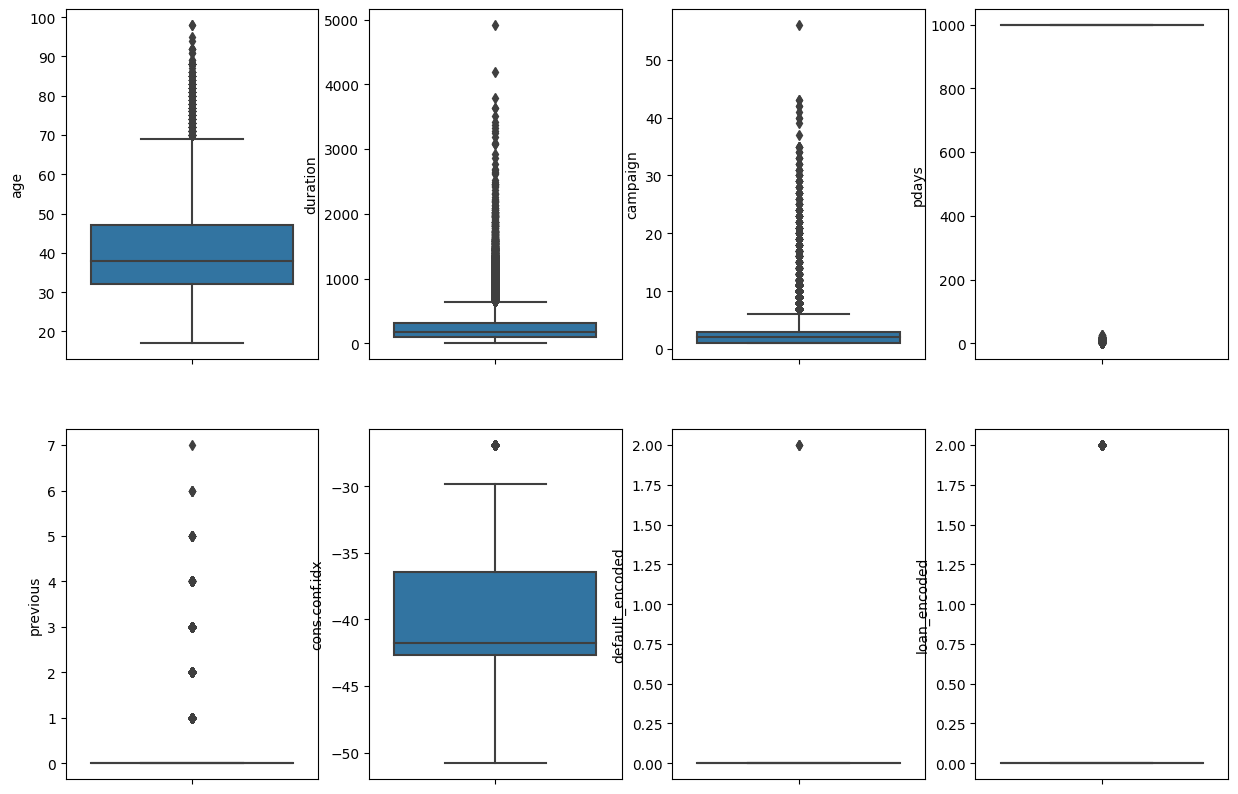

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(15,10), sharex=True)
sns.boxplot(y=d["age"],ax=axs[0][0])
sns.boxplot(y=d["duration"],ax=axs[0][1])
sns.boxplot(y=d["campaign"],ax=axs[0][2])
sns.boxplot(y=d["pdays"],ax=axs[0][3])
sns.boxplot(y=d["previous"],ax=axs[1][0])
sns.boxplot(y=d["cons.conf.idx"],ax=axs[1][1])
sns.boxplot(y=d["default_encoded"],ax=axs[1][2])
sns.boxplot(y=d["loan_encoded"],ax=axs[1][3])

Sau khi xem xét dữ liệu thì mình cho rằng chỉ có age, duration và previous là mình sẽ bỏ đi các outliers, còn các columns còn lại mình sẽ giữ nó

In [ ]:
# Xử Lý Outliers 
lower = 0.25
higher = 0.75
outlier_columns = ['age', 'duration', 'previous']
for column in outlier_columns:     
    Q1 = d[column].quantile(.25)
    Q3 = d[column].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d = d[d[column] >= lower] 
    d = d[d[column] <=upper] 

## *- Fill missing value bằng module KNNImputer*

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30573 entries, 0 to 41186
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                30573 non-null  int64  
 1   duration           30573 non-null  int64  
 2   campaign           30573 non-null  int64  
 3   pdays              30573 non-null  int64  
 4   previous           30573 non-null  int64  
 5   poutcome           30573 non-null  int64  
 6   emp.var.rate       30573 non-null  float64
 7   cons.price.idx     30573 non-null  float64
 8   cons.conf.idx      30573 non-null  float64
 9   euribor3m          30573 non-null  float64
 10  nr.employed        30573 non-null  float64
 11  y                  30573 non-null  int64  
 12  job_encoded        30322 non-null  float64
 13  marital_encoded    30526 non-null  float64
 14  education_encoded  29330 non-null  float64
 15  default_encoded    23705 non-null  float64
 16  housing_encoded    298

In [ ]:
from sklearn.impute import KNNImputer

# Khởi tạo đối tượng KNNImputer với n_neighbors = 9
imputer = KNNImputer(n_neighbors=9)

# Điền giá trị bị khuyết và trả về một mảng Numpy mới
new_array  = imputer.fit_transform(d)

# Tạo một DataFrame mới từ mảng Numpy
df = pd.DataFrame(data=new_array, columns=d.columns)

Vì dữ liệu khuyết thiếu chiếm tới 20% nên mình sẽ không bỏ nó. Minhd sẽ dùng hàm KNNImputer để điền giá trị vào các dòng bị khuyết thiếu.


In [ ]:
df.isnull().sum()

age                  0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
job_encoded          0
marital_encoded      0
education_encoded    0
default_encoded      0
housing_encoded      0
loan_encoded         0
dtype: int64

## *- Xử Lý Data Imbalance*

In [ ]:
y = df["y"]
X = df.drop(['y'], axis=1)

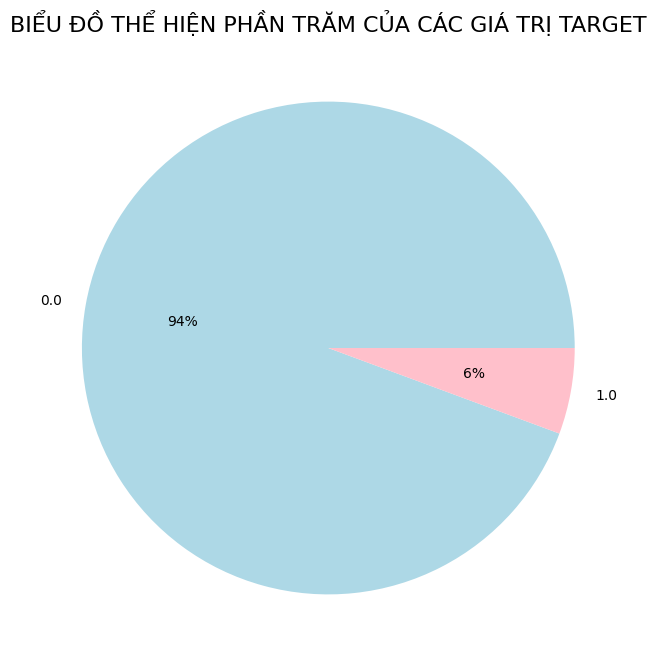

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Biểu đồ thể hiện phần trăm của các giá trị target'.upper(), fontsize = 16)
plt.pie(y.value_counts(),labels=y.unique(), autopct = '%.f%%', colors = {'lightblue', 'pink'})
plt.show()
#data đang bị imbalance nên cần balance lại data

Target data đang bị imbalance nên khi đưa vào model sẽ dẫn đến việc bị overfitting là rất lớn nên trước khi đưa vào model mình sẽ balance lại.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.8)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51926 entries, 0 to 51925
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                51926 non-null  float64
 1   duration           51926 non-null  float64
 2   campaign           51926 non-null  float64
 3   pdays              51926 non-null  float64
 4   previous           51926 non-null  float64
 5   poutcome           51926 non-null  float64
 6   emp.var.rate       51926 non-null  float64
 7   cons.price.idx     51926 non-null  float64
 8   cons.conf.idx      51926 non-null  float64
 9   euribor3m          51926 non-null  float64
 10  nr.employed        51926 non-null  float64
 11  job_encoded        51926 non-null  float64
 12  marital_encoded    51926 non-null  float64
 13  education_encoded  51926 non-null  float64
 14  default_encoded    51926 non-null  float64
 15  housing_encoded    51926 non-null  float64
 16  loan_encoded       519

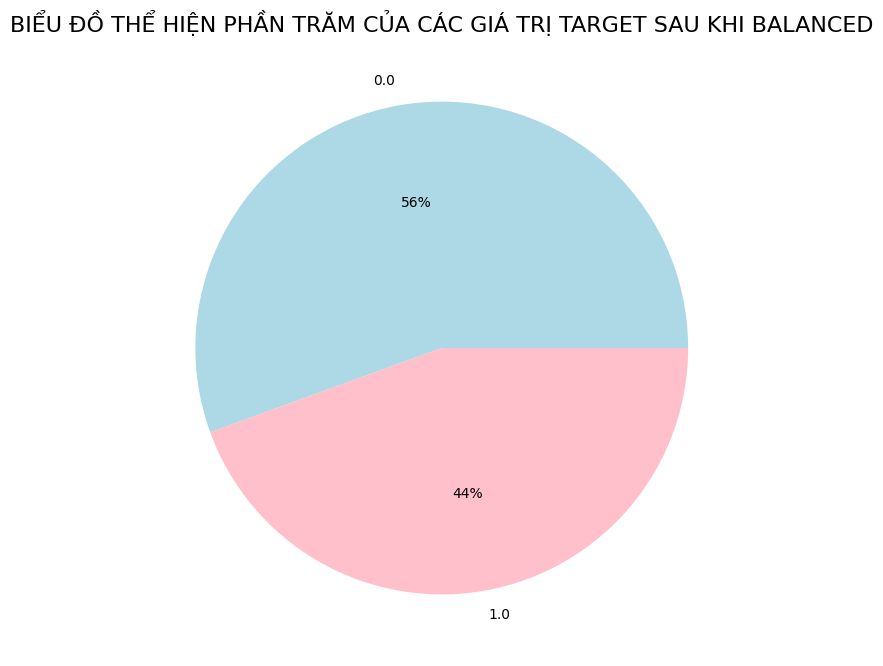

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Biểu đồ thể hiện phần trăm của các giá trị target sau khi balanced'.upper(), fontsize = 16)
plt.pie(y_resampled.value_counts(),labels=y_resampled.unique(), autopct = '%.f%%', colors = {'lightblue', 'pink'})
plt.show()
#target sau khi đã balanced

##Scale data

Để model có thể hoạt động hiệu quả hơn mình sẽ scale data     

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_resampled

array([[ 1.69282274, -0.03418315, -0.82247542, ..., -0.00875131,
        -1.19151704, -0.45385978],
       [ 1.79280527, -0.71022027, -0.82247542, ..., -0.00875131,
        -1.19151704, -0.45385978],
       [-0.20684539, -0.24544475, -0.82247542, ..., -0.00875131,
         0.98905733, -0.45385978],
       ...,
       [-0.09811074, -0.60892843,  0.80004723, ..., -0.00875131,
         0.89361743, -0.45385978],
       [-0.46334692, -0.88972108, -0.4538171 , ..., -0.00875131,
         0.98905733, -0.45385978],
       [-0.3968919 ,  1.86910663, -0.82247542, ..., -0.00875131,
        -0.27602342,  0.8199235 ]])

#DeepLearning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size = 0.80, test_size = 0.20, random_state = 42)

##Inital Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers



model = Sequential()
model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
dl_train_model = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1299/1299 [==============================] - 5s 3ms/step - loss: 0.3619 - accuracy: 0.8405 - val_loss: 0.3054 - val_accuracy: 0.8710
Epoch 2/100
1299/1299 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8662 - val_loss: 0.2800 - val_accuracy: 0.8842
Epoch 3/100
1299/1299 [==============================] - 3s 3ms/step - loss: 0.2905 - accuracy: 0.8778 - val_loss: 0.2626 - val_accuracy: 0.8920
Epoch 4/100
1299/1299 [==============================] - 5s 4ms/step - loss: 0.2752 - accuracy: 0.8851 - val_loss: 0.2461 - val_accuracy: 0.9019
Epoch 5/100
1299/1299 [==============================] - 3s 3ms/step - loss: 0.2614 - accuracy: 0.8912 - val_loss: 0.2363 - val_accuracy: 0.9039
Epoch 6/100
1299/1299 [==============================] - 3s 2ms/step - loss: 0.2539 - accuracy: 0.8959 - val_loss: 0.2296 - val_accuracy: 0.9080
Epoch 7/100
1299/1299 [==============================] - 3s 3ms/step - loss: 0.2450 - accuracy: 0.9001 - val_loss: 0.2213 - val_ac

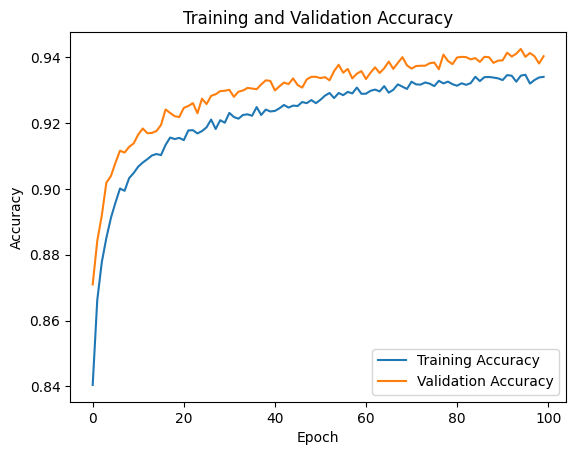

In [ ]:
plt.plot(dl_train_model.history['accuracy'], label='Training Accuracy')
plt.plot(dl_train_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

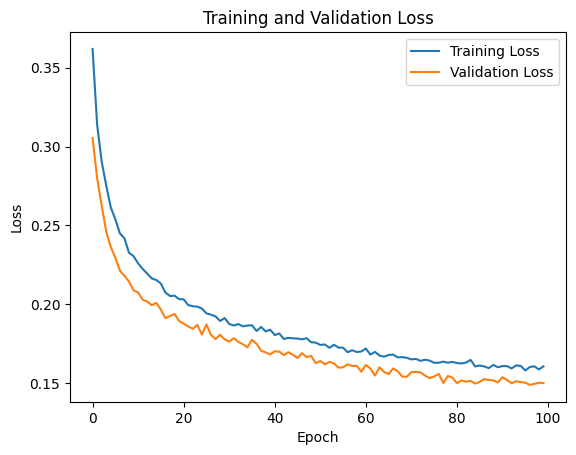

In [ ]:
plt.plot(dl_train_model.history['loss'], label='Training Loss')
plt.plot(dl_train_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

325/325 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = y_test.astype(int)
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(prec)
print(rec)
print(f1)

0.9403042557288658
0.9019607843137255
0.9732848899337465
0.9362664473684209


##Tunning save model

In [ ]:
x_grid, x_not_use, y_grid, y_not_use = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

In [ ]:
x_grid.shape, y_grid.shape

((8308, 17), (8308,))

In [ ]:
from itertools import product
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def define_model(dropout_rate=0.0, weight_constraint=0, neurons= (256,), reg_strength=0.01):   
    model = Sequential()
    if len(neurons) == 1: 
        model.add(Dense(neurons[0], activation='relu', input_dim=x_grid.shape[1], 
                        kernel_constraint=maxnorm(weight_constraint), kernel_regularizer=regularizers.l2(reg_strength)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(neurons[0], activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(neurons[0], activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(neurons[0], activation='relu', input_dim=x_grid.shape[1],
                        kernel_constraint=maxnorm(weight_constraint), kernel_regularizer=regularizers.l2(reg_strength)))
        model.add(Dropout(dropout_rate))
        for n in neurons[1:]:
            model.add(Dense(n, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
            model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=define_model, 
                        verbose=0)


dropout_rate = [0.2, 0.3, 0.4]
weight_constraint = [1, 2, 3]
neurons = [(256,), (256, 192, 256), (512, 256, 256), (512,)]
reg_strength = [0.01, 0.001, 0.0001]
batch_size = [64, 96, 128]
epochs = [5, 10]

In [ ]:
param_grid = dict(dropout_rate=dropout_rate, 
                  weight_constraint=weight_constraint,
                  neurons=neurons, reg_strength=reg_strength,
                  batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = 3, cv=3)

In [ ]:
grid_result = grid.fit(x_grid, y_grid)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.902865 using {'batch_size': 128, 'dropout_rate': 0.2, 'epochs': 10, 'neurons': (512, 256, 256), 'reg_strength': 0.0001, 'weight_constraint': 1}


In [ ]:
best_model =grid_result.best_estimator_

In [ ]:
history = best_model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

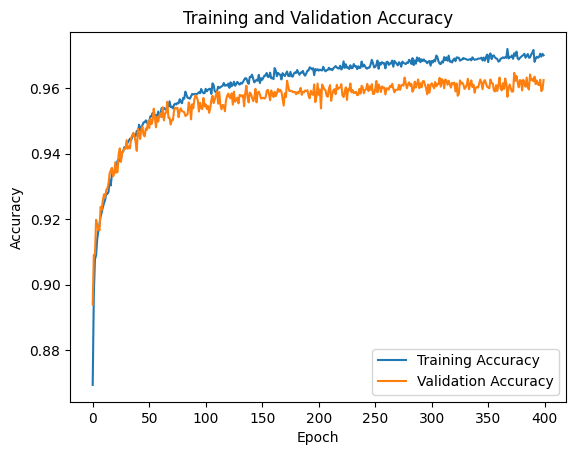

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

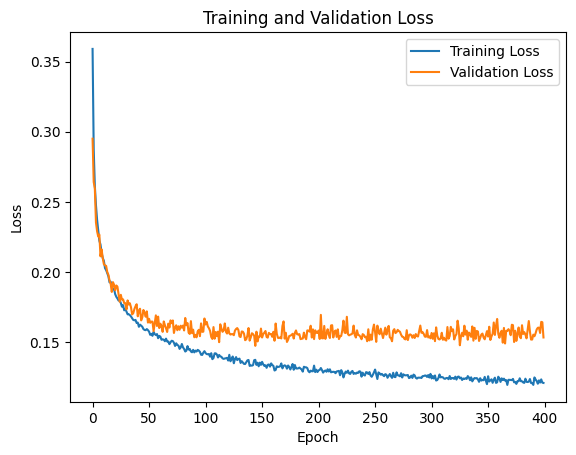

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = best_model.predict(X_test)

325/325 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = y_test.astype(int)
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(prec)
print(rec)
print(f1)

0.96158290005777
0.9443521594684385
0.9720025646505663
0.9579778830963666


In [ ]:
model_final = Sequential()
model_final.add(Dense(512, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_uniform'
                        kernel_constraint=maxnorm(1), kernel_regularizer=regularizers.l2(0.0001)))
model_final.add(Dropout(0.2))
model_final.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_final.add(Dropout(0.2))
model_final.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_final.add(Dropout(0.2))
model_final.add(Dense(1, activation='sigmoid'))
model_final.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model_final.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

In [ ]:
best = grid_result.best_estimator_.model
best.save('best_model.h5')

In [ ]:
best.save_weights('best_model_weights.h5')